# Data cleaning and preprocesing with the Life Expectancy file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

%matplotlib inline

#set seed for reproducibility
np.random.seed(0)

#Read in all data

life_expectancy=pd.read_csv("C:\\Users\\karol\\Downloads\\archive\\Life Expectancy Data.csv")

Description of the data set
Data set comes from Kaggle website : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
In this project we have considered data from year 2000-2015 for 193 countries for further analysis.
The data set consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

Columns Description:
Country: Country
Year: Year
Status: Classification of countries as 'developed' or 'developing' based on their gross domestic product(GDP).
Life expectancy: Life expectancy (years of age).
Adult Mortality: Adult Mortality Rates of both sexes (Probability of dying between 15 and 60 years per 1000 population).
Infant deaths: Number of Infant (0-1 year of age) Deaths per 1000 population.
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).
Percentage expenditure: Expenditure on health as a percentage of GPD per capita. (%)
Hepatitis B: Hepatitis B immunization coverage among 1-year-olds. (%)
Measles: Number of reported cases per 1000 population.
BMI: Average Body Mass index of entire population
Under-five deaths: Number of under-five deaths per 1000 population
Polio: Polio immunization coverage among 1-year-olds (%)
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
GDP: Gross Domestic Product per capita (in USD)
Population: Population of the country
Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%) 
Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9 (%)
Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
Schooling: Number of years of Schooling (years)

In this project I am focusing on pre-procesing  and cleanig techning which are useful if I decide to explore and analyse the dataset more. It answers common question problems like: how to handle missing value, checking outliers,duplicates,inconsistant formatting, basic summary statistic and more.

In [2]:
#checking how large is the dataframe
life_expectancy.shape

(2938, 22)

#The data set consists of 22 Columns and 2938 rows.

In [3]:
# Type of the variables
life_expectancy.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [4]:
#Take a look at some data
#first ten entries
life_expectancy.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
#last ten entiers
life_expectancy.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
# Missing values
# Get the number of missing values per column
missing_values=pd.DataFrame(life_expectancy.isnull().any(),columns=(['Nulls']))
missing_values['Nan_count']=pd.DataFrame(life_expectancy.isnull().sum())
missing_values['Nan_percentage']=round((life_expectancy.isnull().mean()*100),2)
print(missing_values.sort_values(by='Nan_percentage',ascending=False))

                                 Nulls  Nan_count  Nan_percentage
Population                        True        652           22.19
Hepatitis B                       True        553           18.82
GDP                               True        448           15.25
Total expenditure                 True        226            7.69
Alcohol                           True        194            6.60
Income composition of resources   True        167            5.68
Schooling                         True        163            5.55
 thinness 5-9 years               True         34            1.16
 thinness  1-19 years             True         34            1.16
 BMI                              True         34            1.16
Polio                             True         19            0.65
Diphtheria                        True         19            0.65
Life expectancy                   True         10            0.34
Adult Mortality                   True         10            0.34
 HIV/AIDS 

In [7]:
# What % of the values were missing and how many NAN in total total Nan we have ?
total_cells=np.product(life_expectancy.shape)
total_missing=missing_values['Nan_count'].sum()
percent_missing=round((total_missing/total_cells)*100,2)
print( "Total number of missing values is",total_missing,". It gives",percent_missing," % of all data set.")

Total number of missing values is 2563 . It gives 3.97  % of all data set.


#Even if the total of missing values is 3.97 %, we can see that some particular variables has got significant number of Nan. I decide to impute the missing values with KNNImputer() function.

In [8]:
dfwithoutNan=pd.DataFrame(life_expectancy.iloc[:,[0,1,2,5,7,9,15]])
dfwithoutNan.head(5)

,Country,Year,Status,infant deaths,percentage expenditure,Measles,HIV/AIDS
0,Afghanistan,2015,Developing,62,71.279624,1154,0.1
1,Afghanistan,2014,Developing,64,73.523582,492,0.1
2,Afghanistan,2013,Developing,66,73.219243,430,0.1
3,Afghanistan,2012,Developing,69,78.184215,2787,0.1
4,Afghanistan,2011,Developing,71,7.097109,3013,0.1


I will use the Scikit Learn class KNNImputer(). This function imputes missing values with the mean of the values found for the nearest neighbors in the training set. Unlike a SimpleImputer, instead of filling in with mean values from the entire column, KNNImputer will find similarities between instances and impute values based on that proximity.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [9]:
from sklearn.impute import KNNImputer
dfwithNan=pd.DataFrame(life_expectancy.iloc[:,[3,4,6,8,10,11,12,13,14,16,17,18,19,20,21]])
imputer = KNNImputer(n_neighbors=2)
dftransformed=pd.DataFrame(imputer.fit_transform(dfwithNan))
dftransformed.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,65.0,263.0,0.01,65.0,19.1,83.0,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,86.0,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,89.0,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,93.0,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,97.0,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
#Imputation removed column names, so I will put them back
dftransformed.columns=dfwithNan.columns
dftransformed.head(5)

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,0.01,65.0,19.1,83.0,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,86.0,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,89.0,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,93.0,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,97.0,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
#Checking if all Nan has been imputated with a new values
missing_values_count=dftransformed.isnull().any()
missing_values_count

Life expectancy                    False
Adult Mortality                    False
Alcohol                            False
Hepatitis B                        False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [12]:
#Joining the data without Nan and data with imputated Nan, on the rows index values . It will be our new data frame for futher anaysis.
newlife_expectancy=pd.concat([dfwithoutNan,dftransformed],axis=1)
newlife_expectancy.head(5)

,Country,Year,Status,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,...,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,62,71.279624,1154,0.1,65.0,263.0,0.01,...,83.0,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,64,73.523582,492,0.1,59.9,271.0,0.01,...,86.0,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,66,73.219243,430,0.1,59.9,268.0,0.01,...,89.0,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,69,78.184215,2787,0.1,59.5,272.0,0.01,...,93.0,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,71,7.097109,3013,0.1,59.2,275.0,0.01,...,97.0,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
newlife_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
infant deaths                      0
percentage expenditure             0
Measles                            0
 HIV/AIDS                          0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#We can see that data are clean now from Nans values.

In [14]:
# chcecking duplicates
newlife_expectancy.duplicated().any()

False

In [15]:
# Checking for Inconsistent Data Entry
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer
np.random.seed(0)

In [16]:
# Get all the unique values in the 'Country' columns
countries=newlife_expectancy['Country'].unique()

In [54]:
#sort them alphabetically
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [18]:
# check for white spaces in the 'Country' column
white_space = newlife_expectancy['Country'].str.contains(' ')
white_space.any()

# print the rows with white spaces
print(newlife_expectancy[white_space])

                  Country  Year      Status  infant deaths  \
64    Antigua and Barbuda  2015  Developing              0   
65    Antigua and Barbuda  2014  Developing              0   
66    Antigua and Barbuda  2013  Developing              0   
67    Antigua and Barbuda  2012  Developing              0   
68    Antigua and Barbuda  2011  Developing              0   
...                   ...   ...         ...            ...   
2885             Viet Nam  2004  Developing             29   
2886             Viet Nam  2003  Developing             30   
2887             Viet Nam  2002  Developing             30   
2888             Viet Nam  2001  Developing             32   
2889             Viet Nam  2000  Developing             33   

      percentage expenditure  Measles    HIV/AIDS  Life expectancy   \
64                  0.000000         0        0.2              76.4   
65               2422.999774         0        0.2              76.2   
66               1991.430372         0    

In [19]:
#removing whitespace between two phrase in 'Counrty' column
newlife_expectancy['Country']=newlife_expectancy['Country'].str.replace(' ', '')

In [57]:
# Get all the unique values in the 'Country' columns
countries=newlife_expectancy['Country'].unique()
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', 'CaboVerde', 'Cambodia', 'Cameroon',
       'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'CookIslands', 'CostaRica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côted'Ivoire",
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [20]:
# check for white spaces in the 'Country' column
white_space = newlife_expectancy['Country'].str.contains(' ')
white_space.any()

False

In [59]:
#I removed white space between the phrase in 'County' column

In [21]:
#Checking the 'Status' column for white space
# Get all the unique values in the 'Country' columns
status=newlife_expectancy['Status'].unique()
#sort them alphabetically
status.sort()
status

array(['Developed', 'Developing'], dtype=object)

In [22]:
# Get all the unique value of 'Year column'
year=newlife_expectancy['Year'].unique()
year.sort()
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [23]:
# Coverage of data
for  col in newlife_expectancy.select_dtypes(['object','category']):
    print(newlife_expectancy[col].value_counts())

Afghanistan           16
Peru                  16
Nicaragua             16
Niger                 16
Nigeria               16
                      ..
Niue                   1
SanMarino              1
Nauru                  1
SaintKittsandNevis     1
Dominica               1
Name: Country, Length: 193, dtype: int64
Developing    2426
Developed      512
Name: Status, dtype: int64


In [24]:
counts = newlife_expectancy.groupby(['Status']).size()
print(counts)

Status
Developed      512
Developing    2426
dtype: int64


In [27]:
total=len(newlife_expectancy['Status'])
total_developing=counts['Developing']
total_developed=counts['Developed']
# %of Developed country in 'Status' column
percentageofdeveloped=round((total_developed*100)/total,2)
percentageofdeveloping=round((total_developing*100)/total,2)
print("Total developed country covering", percentageofdeveloped," % of the data and total developing country ", percentageofdeveloping," %.")

Total developed country covering 17.43  % of the data and total developing country  82.57  %.


In [65]:
# We have got 193 categories in 'Country' column and two categories in 'Status' column
# Considering that developing country are covering 82,57 % of the dataset and the remaining are developed country, and to improve futher code I will create a new file which I will devide into two data frame based on the "Developed" and "Developing" criteria. Before do it I am going to check newlife_expectancy dataframe for existing outliers.

In [28]:
#Summary of numeric variables
newlife_expectancy_numeric=newlife_expectancy.iloc[:,3:22]
newlife_expectancy_numeric.describe()

,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,30.303948,738.251295,2419.592240,1.742103,69.231875,164.605003,4.573761,79.558373,38.213155,42.035739,82.534717,5.912495,82.310075,7152.330762,1.236299e+07,4.903182,4.931416,0.626936,11.970014
std,117.926501,1987.914858,11467.272489,5.077785,9.510676,124.187433,4.024105,25.477391,19.974950,160.445548,23.379731,2.478160,23.666747,13802.411031,5.495241e+07,4.447548,4.532472,0.210303,3.364891
min,0.000000,0.000000,0.000000,0.100000,36.300000,1.000000,0.010000,1.000000,1.000000,0.000000,3.000000,0.370000,2.000000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,0.000000,4.685343,0.000000,0.100000,63.200000,74.000000,0.900000,73.000000,19.400000,0.000000,78.000000,4.280000,78.000000,482.724583,2.864285e+05,1.600000,1.600000,0.491000,10.000000
50%,3.000000,64.912906,17.000000,0.100000,72.100000,144.000000,3.705000,91.750000,43.000000,4.000000,93.000000,5.720000,93.000000,1841.086830,1.571844e+06,3.400000,3.400000,0.677000,12.325000
75%,22.000000,441.534144,360.250000,0.800000,75.600000,227.000000,7.600000,97.000000,56.100000,28.000000,97.000000,7.430000,97.000000,5875.013464,7.863784e+06,7.300000,7.300000,0.780000,14.300000
max,1800.000000,19479.911610,212183.000000,50.600000,89.000000,723.000000,17.870000,99.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [29]:
#Extreme value analysis for outliers for newlife_expectancy dataframe numeric variables
#calculation of first and third quartile
q1= newlife_expectancy_numeric.quantile(0.25)
q3=newlife_expectancy_numeric.quantile(0.75)
#inter-quartile range iqr ( spread, the distance between the first and the thierd quartile)
iqr= q3-q1

low_boundary= (q1-1.5*iqr)
upp_boundary=(q3+1.5*iqr)
num_of_outliers_L=(newlife_expectancy[iqr.index]< low_boundary).sum()
num_of_outliers_U=(newlife_expectancy[iqr.index] > upp_boundary).sum()
num_of_outliers_total=num_of_outliers_L+num_of_outliers_U


outliers = pd.DataFrame({'low_boundary':low_boundary, 'upp_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L,'num_of_outliers_U':num_of_outliers_U,'num_of_outliers_total':num_of_outliers_total})
print(outliers)

total_newlife_expectancy_numeric=newlife_expectancy_numeric.shape[0]*newlife_expectancy_numeric.shape[1]
print('Total number of outliers in the dataframe are', num_of_outliers_total.sum(),'.')
print('Total number of outliers are', round((num_of_outliers_total.sum()*100)/total_newlife_expectancy_numeric,2) ,'% of all numeric values.')

                                 low_boundary  upp_boundary  \
infant deaths                   -3.300000e+01  5.500000e+01   
percentage expenditure          -6.505879e+02  1.096807e+03   
Measles                         -5.403750e+02  9.006250e+02   
 HIV/AIDS                       -9.500000e-01  1.850000e+00   
Life expectancy                  4.460000e+01  9.420000e+01   
Adult Mortality                 -1.555000e+02  4.565000e+02   
Alcohol                         -9.150000e+00  1.765000e+01   
Hepatitis B                      3.700000e+01  1.330000e+02   
 BMI                            -3.565000e+01  1.111500e+02   
under-five deaths               -4.200000e+01  7.000000e+01   
Polio                            4.950000e+01  1.255000e+02   
Total expenditure               -4.450000e-01  1.215500e+01   
Diphtheria                       4.950000e+01  1.255000e+02   
GDP                             -7.605709e+03  1.396345e+04   
Population                      -1.107960e+07  1.922982

We have got significat number of outliers in the dataframe. To be able to use some of the machine learning technics after, I  will be usefull to deal with them either by removing all or use imputation. 

In [30]:
#Replacing outliers with Nan value in newlife_expectancy dataframe using mask() fuction form pandas

newlife_expectancy = newlife_expectancy.mask((newlife_expectancy.lt(low_boundary)) | (newlife_expectancy.gt (upp_boundary)),np.nan)

In [31]:
#Checking if the replacement was done correctly 
newlife_expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
infant deaths                      315
percentage expenditure             389
Measles                            542
 HIV/AIDS                          542
Life expectancy                     17
Adult Mortality                     86
Alcohol                              1
Hepatitis B                        280
 BMI                                 0
under-five deaths                  394
Polio                              279
Total expenditure                   40
Diphtheria                         298
GDP                                396
Population                         367
 thinness  1-19 years               82
 thinness 5-9 years                 95
Income composition of resources    130
Schooling                           40
dtype: int64

The Nan apears excactly on the place of the outliers.
I will use SimpleImputer to replace this missing values with the mean value along each columns.

In [32]:
newlife_expectancy.head(5)

,Country,Year,Status,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,...,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,NaN,71.279624,NaN,0.1,65.0,263.0,0.01,...,NaN,NaN,8.16,65.0,584.259210,NaN,NaN,NaN,0.479,10.1
1,Afghanistan,2014,Developing,NaN,73.523582,492.0,0.1,59.9,271.0,0.01,...,NaN,58.0,8.18,62.0,612.696514,327582.0,NaN,NaN,0.476,10.0
2,Afghanistan,2013,Developing,NaN,73.219243,430.0,0.1,59.9,268.0,0.01,...,NaN,62.0,8.13,64.0,631.744976,NaN,NaN,NaN,0.470,9.9
3,Afghanistan,2012,Developing,NaN,78.184215,NaN,0.1,59.5,272.0,0.01,...,NaN,67.0,8.52,67.0,669.959000,3696958.0,NaN,NaN,0.463,9.8
4,Afghanistan,2011,Developing,NaN,7.097109,NaN,0.1,59.2,275.0,0.01,...,NaN,68.0,7.87,68.0,63.537231,2978599.0,NaN,NaN,0.454,9.5


In [33]:
#There are four variables where we dont have outliers.
#dfwithoutNan=pd.DataFrame(newlife_expectancy.iloc[:,[0,1,2,11]])
#dfwithoutNan.head(5)

In [53]:
#from sklearn.impute import SimpleImputer
# Imputation
#dfwithNan=pd.DataFrame(newlife_expectancy.iloc[:,[3,4,5,6,7,8,9,10,12,13,14,16,17,18,19,20,21]])
#myimputer = SimpleImputer()
#dftransformed=pd.DataFrame(myimputer.fit_transform(dfwithNan))
#dftransformed.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,8.667556,71.279624,82.890651,0.1,65.0,263.0,0.01,65.0,9.907233,89.027078,8.16,584.259210,3.242784e+06,4.465984,4.423954,0.479,10.1
1,8.667556,73.523582,492.000000,0.1,59.9,271.0,0.01,62.0,9.907233,58.000000,8.18,612.696514,3.275820e+05,4.465984,4.423954,0.476,10.0
2,8.667556,73.219243,430.000000,0.1,59.9,268.0,0.01,64.0,9.907233,62.000000,8.13,631.744976,3.242784e+06,4.465984,4.423954,0.470,9.9
3,8.667556,78.184215,82.890651,0.1,59.5,272.0,0.01,67.0,9.907233,67.000000,8.52,669.959000,3.696958e+06,4.465984,4.423954,0.463,9.8
4,8.667556,7.097109,82.890651,0.1,59.2,275.0,0.01,68.0,9.907233,68.000000,7.87,63.537231,2.978599e+06,4.465984,4.423954,0.454,9.5


In [54]:
#Imputation removed column names, so I will put them back
#dftransformed.columns=dfwithNan.columns
#dftransformed.head(5)

,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,under-five deaths,Polio,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,8.667556,71.279624,82.890651,0.1,65.0,263.0,0.01,65.0,9.907233,89.027078,8.16,584.259210,3.242784e+06,4.465984,4.423954,0.479,10.1
1,8.667556,73.523582,492.000000,0.1,59.9,271.0,0.01,62.0,9.907233,58.000000,8.18,612.696514,3.275820e+05,4.465984,4.423954,0.476,10.0
2,8.667556,73.219243,430.000000,0.1,59.9,268.0,0.01,64.0,9.907233,62.000000,8.13,631.744976,3.242784e+06,4.465984,4.423954,0.470,9.9
3,8.667556,78.184215,82.890651,0.1,59.5,272.0,0.01,67.0,9.907233,67.000000,8.52,669.959000,3.696958e+06,4.465984,4.423954,0.463,9.8
4,8.667556,7.097109,82.890651,0.1,59.2,275.0,0.01,68.0,9.907233,68.000000,7.87,63.537231,2.978599e+06,4.465984,4.423954,0.454,9.5


In [55]:
#Checking if all Nan has been imputated with a new values
#missing_values_count=dftransformed.isnull().any()
#missing_values_count

infant deaths                      False
percentage expenditure             False
Measles                            False
 HIV/AIDS                          False
Life expectancy                    False
Adult Mortality                    False
Alcohol                            False
Hepatitis B                        False
under-five deaths                  False
Polio                              False
Total expenditure                  False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [56]:
#Joining the data without Nan and data with imputated Nan, on the rows index values . It will be our new data frame for futher anaysis.
#newlife_expectancy=pd.concat([dfwithoutNan,dftransformed],axis=1)
#newlife_expectancy.head(5)

,Country,Year,Status,BMI,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,...,Hepatitis B,under-five deaths,Polio,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,19.1,8.667556,71.279624,82.890651,0.1,65.0,263.0,...,65.0,9.907233,89.027078,8.16,584.259210,3.242784e+06,4.465984,4.423954,0.479,10.1
1,Afghanistan,2014,Developing,18.6,8.667556,73.523582,492.000000,0.1,59.9,271.0,...,62.0,9.907233,58.000000,8.18,612.696514,3.275820e+05,4.465984,4.423954,0.476,10.0
2,Afghanistan,2013,Developing,18.1,8.667556,73.219243,430.000000,0.1,59.9,268.0,...,64.0,9.907233,62.000000,8.13,631.744976,3.242784e+06,4.465984,4.423954,0.470,9.9
3,Afghanistan,2012,Developing,17.6,8.667556,78.184215,82.890651,0.1,59.5,272.0,...,67.0,9.907233,67.000000,8.52,669.959000,3.696958e+06,4.465984,4.423954,0.463,9.8
4,Afghanistan,2011,Developing,17.2,8.667556,7.097109,82.890651,0.1,59.2,275.0,...,68.0,9.907233,68.000000,7.87,63.537231,2.978599e+06,4.465984,4.423954,0.454,9.5


In [57]:
#newlife_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
 BMI                               0
infant deaths                      0
percentage expenditure             0
Measles                            0
 HIV/AIDS                          0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
under-five deaths                  0
Polio                              0
Total expenditure                  0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [59]:
#Chceking newlife_expectancy for outliers
#newlife_expectancy_numeric=newlife_expectancy.iloc[:,3:22]
#q1= newlife_expectancy_numeric.quantile(0.25)
#q3=newlife_expectancy_numeric.quantile(0.75)
#inter-quartile range iqr ( spread, the distance between the first and the thierd quartile)
#iqr= q3-q1

#low_boundary= (q1-1.5*iqr)
#upp_boundary=(q3+1.5*iqr)
#num_of_outliers_L=(newlife_expectancy[iqr.index]< low_boundary).sum()
#num_of_outliers_U=(newlife_expectancy[iqr.index] > upp_boundary).sum()
#num_of_outliers_total=num_of_outliers_L+num_of_outliers_U


#outliers = pd.DataFrame({'low_boundary':low_boundary, 'upp_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L,'num_of_outliers_U':num_of_outliers_U,'num_of_outliers_total':num_of_outliers_total})
#print(outliers)

#total_newlife_expectancy_numeric=newlife_expectancy_numeric.shape[0]*newlife_expectancy_numeric.shape[1]
#print('Total number of outliers', num_of_outliers_total.sum(),'.')
#print('Total number of outliers are', round((num_of_outliers_total.sum()*100)/total_newlife_expectancy_numeric,2) ,'% of all numeric values.')

                                 low_boundary  upp_boundary  \
 BMI                            -3.565000e+01  1.111500e+02   
infant deaths                   -1.350000e+01  2.250000e+01   
percentage expenditure          -2.417045e+02  4.153351e+02   
Measles                         -1.243360e+02  2.072266e+02   
 HIV/AIDS                       -1.085351e-01  4.475584e-01   
Life expectancy                  4.516250e+01  9.386250e+01   
Adult Mortality                 -1.420000e+02  4.340000e+02   
Alcohol                         -9.150000e+00  1.765000e+01   
Hepatitis B                      5.950000e+01  1.195000e+02   
under-five deaths               -1.486085e+01  2.476808e+01   
Polio                            6.700000e+01  1.150000e+02   
Total expenditure               -2.462500e-01  1.182375e+01   
GDP                             -3.969330e+03  7.902815e+03   
Population                      -4.548303e+06  8.344315e+06   
 thinness  1-19 years           -6.350000e+00  1.485000

The results of imputing outliers with mean value are not super efficient. It decrease only aroud 2% therefore I decide to drop all the outliers from dataframe.

In [34]:
#Droping the Nan value
newlife_expectancy=newlife_expectancy.dropna(axis=0)
newlife_expectancy.head(5)

,Country,Year,Status,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,...,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,0.0,364.975229,0.0,0.1,77.8,74.0,4.60,...,0.0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,0.0,428.749067,0.0,0.1,77.5,8.0,4.51,...,1.0,98.0,5.88,98.0,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,0.0,430.876979,0.0,0.1,77.2,84.0,4.76,...,1.0,99.0,5.66,99.0,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,0.0,412.443356,9.0,0.1,76.9,86.0,5.14,...,1.0,99.0,5.59,99.0,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,0.0,437.062100,28.0,0.1,76.6,88.0,5.37,...,1.0,99.0,5.71,99.0,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [35]:
newlife_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
infant deaths                      0
percentage expenditure             0
Measles                            0
 HIV/AIDS                          0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [36]:
# Puting all data in a new csv file
newlife_expectancy.to_csv('newlife_expectancy.csv',index=False)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

%matplotlib inline
#colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
#plt.style.use('seaborn-white')
#plt.rc('figure', figsize=(12,8))
#plt.rc('font', size=18)
#plt.rc('axes', labelsize=14, titlesize=14)
#plt.rc('legend', fontsize=10)
#plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)

newlife_expectancy=pd.read_csv("C:\\Users\\karol\\newlife_expectancy.csv")
newlife_expectancy.head(5)

,Country,Year,Status,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,...,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Albania,2015,Developing,0.0,364.975229,0.0,0.1,77.8,74.0,4.60,...,0.0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,0.0,428.749067,0.0,0.1,77.5,8.0,4.51,...,1.0,98.0,5.88,98.0,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,0.0,430.876979,0.0,0.1,77.2,84.0,4.76,...,1.0,99.0,5.66,99.0,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,0.0,412.443356,9.0,0.1,76.9,86.0,5.14,...,1.0,99.0,5.59,99.0,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,0.0,437.062100,28.0,0.1,76.6,88.0,5.37,...,1.0,99.0,5.71,99.0,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [39]:
# Divide dataset into two data frame based on 'Developed' and ' Developing' status

df_developed = newlife_expectancy.loc[newlife_expectancy['Status']=='Developed'].copy()
df_developing = newlife_expectancy.loc[newlife_expectancy['Status']=='Developing'].copy()


# Exploratory Data Analysis

In [40]:
#Summary of numeric variables for developed country
df_developed_numeric=df_developed.iloc[:,3:22]
df_developed_numeric.describe()

,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000
mean,0.567708,297.247931,56.791667,1.000000e-01,78.305729,90.416667,9.586797,94.302083,52.626562,0.75000,95.505208,7.047943,95.531250,4404.441343,2.496386e+06,1.515104,1.506250,0.833737,15.510938
std,1.026150,316.491930,130.616013,1.391407e-17,4.367301,53.285592,3.034742,8.108227,16.479398,1.19335,3.665314,2.296705,3.703552,3335.954419,3.064630e+06,0.794570,0.864884,0.058146,1.779680
min,0.000000,0.000000,0.000000,1.000000e-01,69.900000,2.000000,0.010000,54.500000,5.100000,0.00000,73.000000,1.170000,73.000000,12.277330,1.230000e+02,0.300000,0.200000,0.708000,11.700000
25%,0.000000,8.639922,0.000000,1.000000e-01,74.800000,58.750000,8.102500,94.000000,54.575000,0.00000,94.000000,6.215000,94.000000,1755.459177,1.947318e+05,0.800000,0.700000,0.791875,14.275000
50%,0.000000,169.158215,6.500000,1.000000e-01,78.000000,77.500000,10.430000,96.750000,57.550000,0.00000,96.000000,7.340000,96.000000,3894.950745,1.136724e+06,1.400000,1.400000,0.828000,15.300000
75%,1.000000,519.662388,39.000000,1.000000e-01,81.400000,127.250000,11.565000,98.000000,61.300000,1.00000,98.000000,8.515000,98.000000,5740.149990,3.896572e+06,2.100000,2.100000,0.886000,16.425000
max,4.000000,1040.278436,764.000000,1.000000e-01,89.000000,229.000000,13.780000,99.000000,68.800000,5.00000,99.000000,11.530000,99.000000,13893.187680,1.661539e+07,3.800000,4.200000,0.948000,20.700000


In [41]:
#Summary for developing country
df_developing_numeric=df_developing.iloc[:, 3:22]
df_developing_numeric.describe()

,infant deaths,percentage expenditure,Measles,HIV/AIDS,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,9.290000e+02,929.000000,929.000000,929.000000,929.000000
mean,5.582347,184.627863,54.635091,0.263509,71.390958,139.595802,3.734715,90.135630,41.752637,7.032293,91.708827,5.742939,91.554360,2820.977273,2.873499e+06,4.219376,4.218084,0.670404,12.373412
std,8.771399,248.090868,140.816229,0.343306,4.994720,77.212575,3.366268,11.191125,18.369007,11.332601,8.923072,1.974605,8.880493,2874.641069,4.321534e+06,3.247305,3.278876,0.105858,2.042187
min,0.000000,0.000000,0.000000,0.100000,49.700000,1.000000,0.010000,38.500000,2.000000,0.000000,55.000000,0.650000,51.000000,8.376432,3.400000e+01,0.100000,0.100000,0.385000,5.000000
25%,0.000000,1.575160,0.000000,0.100000,68.000000,92.000000,0.710000,87.000000,27.400000,0.000000,88.000000,4.500000,88.000000,617.317648,1.372860e+05,1.900000,1.900000,0.610500,11.100000
50%,2.000000,59.635957,0.000000,0.100000,72.700000,144.000000,3.100000,94.000000,47.100000,2.000000,95.000000,5.710000,95.000000,1812.367823,7.941435e+05,3.300000,3.300000,0.697000,12.600000
75%,8.000000,288.401626,23.000000,0.300000,74.800000,189.000000,5.820000,98.000000,55.100000,9.000000,98.000000,6.880000,98.000000,4126.146710,3.565716e+06,6.100000,6.200000,0.742000,13.600000
max,55.000000,1092.155356,863.000000,1.800000,89.000000,413.000000,17.310000,99.000000,87.300000,66.000000,99.000000,12.110000,99.000000,13653.226400,1.907161e+07,15.400000,15.800000,0.893000,17.700000


In [43]:
#Skewness coefficients
#A value of zero is symmetrical distribution,
#A coefficient with a negative value is a left-skewed distribution (long left arm, mean smaller than median)
#A coefficient with a positive value is a right-skewed distribution (long right arm, mean bigger than median)
df_developed_numeric.skew()

infant deaths                      1.945549
percentage expenditure             0.847509
Measles                            3.373988
 HIV/AIDS                          0.000000
Life expectancy                    0.368300
Adult Mortality                    0.493130
Alcohol                           -1.392814
Hepatitis B                       -3.569981
 BMI                              -2.125894
under-five deaths                  1.746521
Polio                             -2.554241
Total expenditure                 -0.978603
Diphtheria                        -2.480655
GDP                                1.100169
Population                         1.512857
 thinness  1-19 years              0.506183
 thinness 5-9 years                0.577205
Income composition of resources   -0.053048
Schooling                          0.563214
dtype: float64

In [44]:
df_developing_numeric.skew()

infant deaths                      2.435052
percentage expenditure             1.523582
Measles                            3.464250
 HIV/AIDS                          2.558629
Life expectancy                   -0.633667
Adult Mortality                   -0.047703
Alcohol                            0.951793
Hepatitis B                       -1.885557
 BMI                              -0.643035
under-five deaths                  2.443947
Polio                             -1.718401
Total expenditure                  0.125566
Diphtheria                        -1.771247
GDP                                1.479952
Population                         1.943168
 thinness  1-19 years              1.406715
 thinness 5-9 years                1.432547
Income composition of resources   -0.697540
Schooling                         -0.618823
dtype: float64

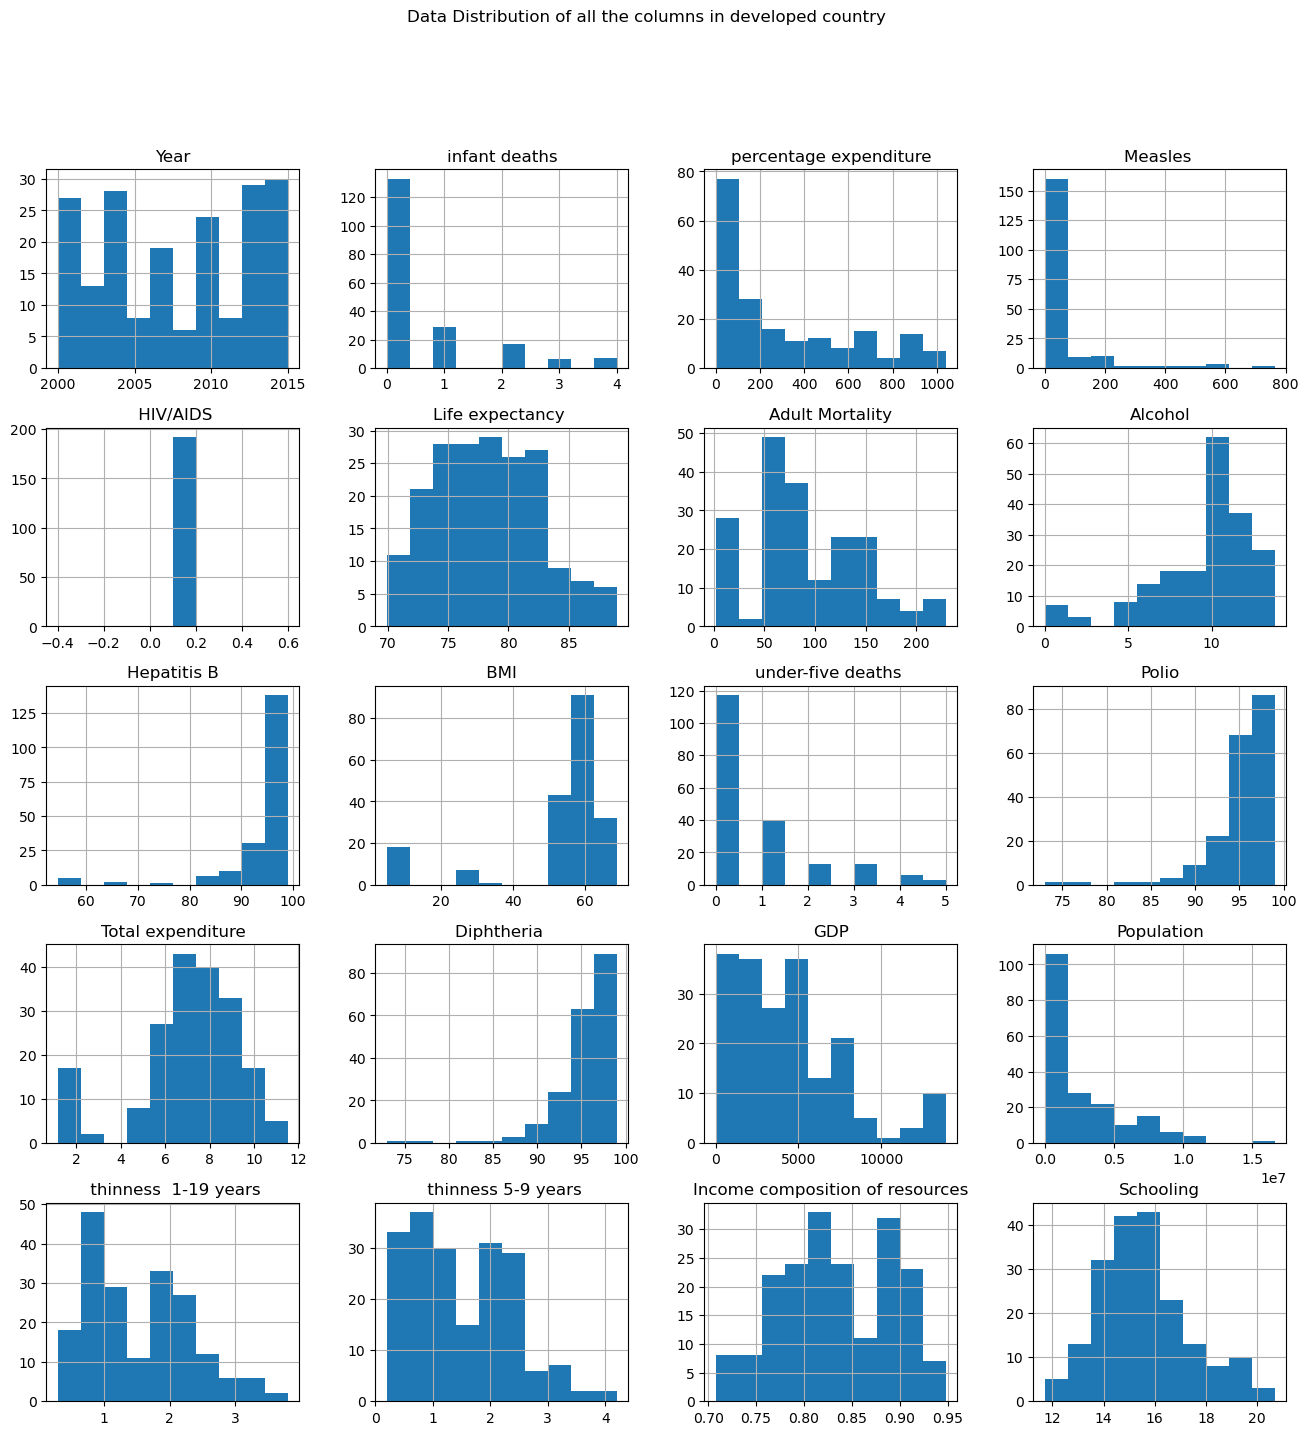

In [45]:
# Histogram for each numeric value
# Developed countries

df_developed.hist(bins=10, figsize=(16,16))
plt.suptitle("Data Distribution of all the columns in developed country")
plt.show()

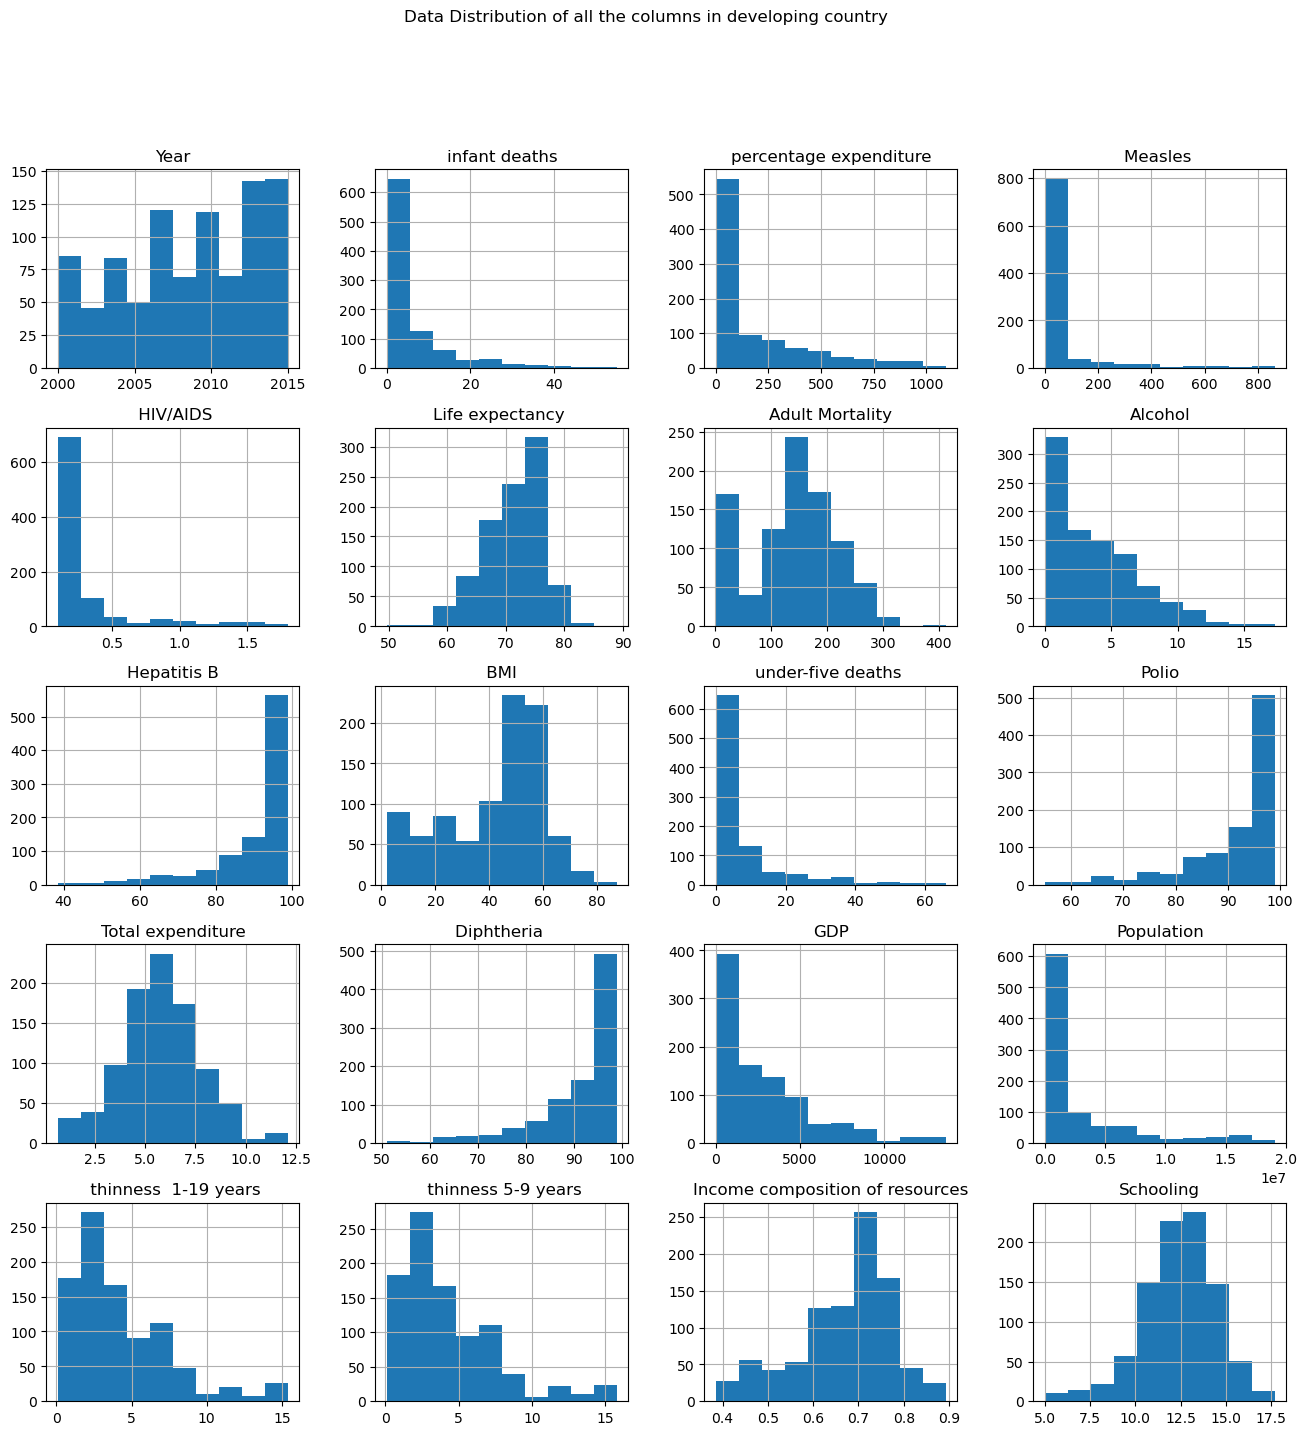

In [46]:
# Histogram for each numeric value
# Developing countries

df_developing.hist(bins=10, figsize=(16,16))
plt.suptitle("Data Distribution of all the columns in developing country")
plt.show()